# Project: Sales Trend Analysis in E-Commerce

___

## 1. Introduction

Name    : Yonathan Anggraiwan

I am a data analyst working at an e-commerce company. On this occasion, the company owner asked me to analyze the annual sales data from their stores. I am responsible for delivering accurate analytical insights using statistical calculations, as well as creating a visualization dashboard to present to the store’s senior management.

Objective:

The objective of this analysis process is to thoroughly understand the dataset, perform the analysis, and develop an interactive dashboard for presentation.

___
## 2. Import Libraries

In [46]:
import pandas as pd                         # Import package pandas
import scipy as sp                          # Import package scipy
import statistics as stats                  # Import package statistics
import numpy as np                          # Import package numpy
import matplotlib.pyplot as plt             # Import package matplotlib.pyplot
import seaborn as sns                       # Import package seaborn
from scipy import stats                     # Import stats dalam package scipy untuk akses pengolahan statistika
import plotly.express as px                 # Import plotly express untuk package visualisasi plotly

___
## 3. Business Understanding / Problem Statement 

**Problem Topic:**  
The main challenge of this analysis process lies in selecting the appropriate methods for data analysis and visualization. Additionally, it's important to identify whether there are correlations or relationships among the dataset’s columns or features.

**SMART Framework:**

- **Specific:** Identify product sales trends to improve future sales performance at the department store where I work.  
- **Measurable:** Increase store sales by 10% by leveraging insights from trend analysis. The key metric is *Customer Loyalty with Retention*, which reflects how the company attracts, convinces, and retains customers to make repeat purchases. The ultimate goal is to build long-term, profitable relationships to sustain growth.  
- **Achievable:** By understanding product sales trends, the 10% sales increase is attainable.  
- **Relevant:** Studying product sales trends directly supports the objective of boosting store performance.  
- **Time-bound:** The sales trend analysis will be completed within 6 days, while the targeted 10% increase in annual sales is projected to be reached within one year.

By analyzing product sales trends over a six-day period, I aim to optimize strategies based on the *Customer Loyalty with Retention* metric, aligning closely with consumer preferences to help drive a 10% sales increase in the following year.

___
## 3. Data Loading

Dataset Source:
The dataset I used was obtained from the website Kaggle.com and can be accessed via [this link.](https://www.kaggle.com/datasets/zeesolver/consumer-behavior-and-shopping-habits-dataset/data)

After downloading the dataset, I loaded it using the pandas syntax in Python.

In [47]:
df = pd.read_csv("Sales Trend Analysis in E-Commerce.csv")
df.head(3)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly


**Insight:**  
This dataset contains consumer shopping transaction records, featuring several columns that reflect various aspects of consumer behavior. It includes 14 categorical variables and 5 numerical ones, with a total of 3,900 rows.

Below is a brief overview of the columns:

1. **Customer ID** – Unique identifier for each customer  
2. **Age** – Customer's age  
3. **Gender** – Customer's gender  
4. **Item Purchased** – Item bought (e.g., blouse, sweater, jeans, sandals, etc.)  
5. **Category** – Product category (e.g., clothing, footwear, outerwear, accessories)  
6. **Purchase Amount (USD)** – Total amount spent by the customer in USD  
7. **Location** – Transaction location  
8. **Size** – Size of the purchased item (S, M, L, XL)  
9. **Color** – Color of the purchased item  
10. **Season** – Season in which the purchase was made  
11. **Review Rating** – Rating provided by the customer  
12. **Subscription Status** – Customer's membership status  
13. **Payment Method** – Payment method used  
14. **Discount Applied** – Whether a discount was applied  
15. **Promo Code Used** – Whether a promo code was used  
16. **Previous Purchases** – Total previous spending (USD)  
17. **Preferred Payment Method** – Customer’s preferred payment option  
18. **Frequency of Purchases** – Frequency of customer purchases

Several of these columns—such as payment method, shipping type, discount applied, previous purchases, preferred payment method, and frequency of purchases—serve as indicators of consumer behavior.

However, after initial analysis, it became apparent that the user is more interested in understanding variable relationships and visual data representation for identifying sales trends. Therefore, some behavior-related columns may not be the main focus in this context.

At first glance, the data values appear to be consistent and valid, but I plan to investigate them further to ensure accuracy and quality.

___
## 4. Data Preprocessing

I want to analyze the data further using pandas syntax.

In [48]:
df.shape

(3900, 19)

The dataset contains 3,900 entries across 17 variables.

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

**Insight:**

There are no missing values in the dataset, and the data types of each column appear to be appropriately assigned. 

However, a further check will be conducted using pandas syntax to ensure data integrity and consistency.
___

In [50]:
df.isna().sum().sum()

np.int64(0)

**Insight:**

It is confirmed that there are no missing values in the dataset, and all data types are correctly assigned. 

However, to ensure data cleanliness, it's important to check for duplicate records.

In [51]:
# check data duplikat
df.duplicated().sum()

np.int64(0)

**Insight:**

There are no duplicate records in the dataset, which makes the data suitable for further processing.
However, there is semantic overlap between the columns “Discount Applied” and “Promo Code Used.” 

The “Discount Applied” column captures whether a customer received a price reduction during the transaction, which inherently involves the use of a promotional code. 

Given this redundancy, I have chosen to drop the “Promo Code Used” column to avoid duplicate information and improve data clarity.
___

In [52]:
df = df.drop(columns=["Promo Code Used"])

**Insight:**

The "Promo Code Used" column has been removed from the dataset due to its redundancy with "Discount Applied."

Next, to streamline the coding process and improve readability, several columns with lengthy names have been renamed with shorter, more concise labels.

In addition, the "Customer ID" column has been set as the dataset index to facilitate easier referencing and data management throughout the analysis.
___

In [53]:
df.rename(columns={"Purchase Amount (USD)": "PA",
                   "Preferred Payment Method":"PPM",
                   "Frequency of Purchases":"FOP",
                   "Subscription Status":"SS",
                   "Review Rating":"RR",
                   "Discount Applied":"DA",
                   "Previous Purchases":"PP"}, inplace=True)

df = df.set_index('Customer ID') # Mengubah kolom customer ID menjadi index data
df.head(5)

,Age,Gender,Item Purchased,Category,PA,Location,Size,Color,Season,RR,SS,Payment Method,Shipping Type,DA,PP,PPM,FOP
Customer ID,,,,,,,,,,,,,,,,,
1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,14,Venmo,Fortnightly
2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,2,Cash,Fortnightly
3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,23,Credit Card,Weekly
4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,49,PayPal,Weekly
5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,31,PayPal,Annually


**Insight:**

The next step involves examining the descriptive statistics of the dataset using the .describe() method. This will return key summary metrics such as the mean, standard deviation, minimum, and maximum values for each numerical column.

These statistics are essential for identifying the overall distribution of numerical features, such as whether the data appears normally distributed, and for detecting the presence of potential outliers.
___

In [54]:
df.describe()

,Age,PA,RR,PP
count,3900.000000,3900.000000,3900.000000,3900.000000
mean,44.068462,59.764359,3.749949,25.351538
std,15.207589,23.685392,0.716223,14.447125
min,18.000000,20.000000,2.500000,1.000000
25%,31.000000,39.000000,3.100000,13.000000
50%,44.000000,60.000000,3.700000,25.000000
75%,57.000000,81.000000,4.400000,38.000000
max,70.000000,100.000000,5.000000,50.000000


**Insight:**

Based on the descriptive statistics, the following observations were made:
- Age

    The standard deviation is 15.20, indicating that customer ages vary widely, ranging from 18 to 70 years old.

    The average age is 44 years.
- Purchase Amount (PA)

    With a standard deviation of 23.68, purchase amounts show considerable variation—from a minimum of $20 to a maximum of $100.

    The average purchase value is $59.76.
- Review Rating (RR)

    The standard deviation is relatively low at 0.71, suggesting minimal variation.

    The average rating is 3.75, which implies that most customers felt their shopping experience was "average."

    This suggests that the company should improve service quality, store ambiance, and product selection to increase customer satisfaction.
- Previous Purchases (PP)

    A standard deviation of 14.44 reflects high variability in customers' past spending, ranging from $1 to $50.

    The average historical spending is $25.35.

___

Next is the categorical columns.

In [55]:
df.describe(include='object')

,Gender,Item Purchased,Category,Location,Size,Color,Season,SS,Payment Method,Shipping Type,DA,PPM,FOP
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,6,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Credit Card,Free Shipping,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,696,675,2223,677,584


**Insight:**

- Gender
    This column contains the customer’s gender: “Male” or “Female,” with “Male” being the most common.

- Item Purchased
    Represents the type of item purchased, with 25 unique item types. The most frequently sold item is “Blouse.”
- Category
    Refers to product categories such as clothing, footwear, outerwear, and accessories. “Clothing” is the most sold category.
- Location
    Indicates the store location where the transaction took place.
- Size
    Specifies the size of the purchased item (e.g., S, M, L, XL).
- Color
    Contains the color of the purchased item.
- Season
    Records the season during which the transaction occurred.
- Subscription Status
    Reflects the customer’s membership status.
- Payment Method
    Captures the payment method used for the transaction.
- Shipping Type
    Describes the delivery method or fulfillment type, such as store pickup, express, or next-day air.
- Discount Applied
    Indicates whether a discount was used during the purchase.
- Preferred Payment Method
    Represents the customer’s preferred way of paying.
- Frequency of Purchases
    Shows how often the customer shops, ranging from weekly to yearly patterns.

While these summaries help in understanding the categorical structure of the dataset, they are not yet sufficient to capture deeper patterns. 

Therefore, the next step involves calculating variance, skewness, and kurtosis for the numerical data to assess distribution shape, detect outliers, and support hypothesis formulation.

This analysis will be addressed in EDA Session 11.

Exploratory Data Analysis (EDA) Objectives:

1. Which gender shops more frequently?

2. Which product category has the highest number of sales?

3. What is the total transaction value per product category?

4. Which product size is sold most often?

5. Are there more subscribed customers than unsubscribed ones?

6. What is the total transaction value from subscribed vs. unsubscribed customers?

7. Do more customers use discounts when shopping?

8. Is the total transaction value higher for purchases with discounts or without?

9. Which season generates the highest transaction volume?

10. What is the distribution of sales data across each consumer location?

11. What are the descriptive statistics of the dataset?

12. What are the relationships among all variables?
___

### 5.1 EDA 1. Which gender shops more frequently?

Entering EDA number 1 is identifying which gender shops most frequently.

Although this has been explained previously through code, I still need to present the result with a clear data visualization.

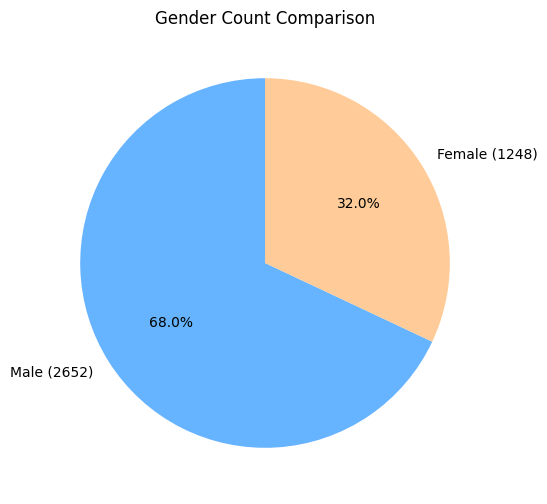

In [56]:
gender_counts = df["Gender"].value_counts()


labels = [f"{gender} ({count})" for gender, count in zip(gender_counts.index, gender_counts.values)]


plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=labels, autopct="%.1f%%", colors=["#66b3ff", "#ffcc99"], startangle=90)


plt.title("Gender Count Comparison")
plt.show()

**Insight:**

The most frequent shoppers are Male customers, accounting for 68% of total transactions. This is a significant disparity compared to the Female segment. One possible explanation for this imbalance is that the available product selection may lean more toward male oriented items, or that the store is perceived primarily as a men’s goods retailer.

**Recommendation:**

To address this, the store should maintain its strong product flow for Male customers while simultaneously expanding its offerings for Female customers. This can be done by introducing trendy and in demand brands currently popular in the market. By doing so, the store can attract a more diverse customer base, ultimately increasing foot traffic and boosting overall sales
___

### 5.2 EDA. Which product category has the highest number of sales?

EDA number 2 aims to identify which product category generates the highest sales in the store. To support this analysis, a data visualization is created by aggregating the total number of transactions for each product category.

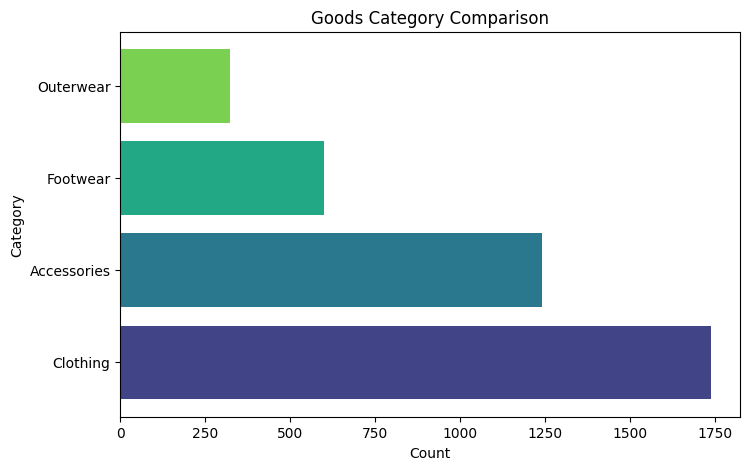

In [57]:
category_counts = df["Category"].value_counts()

plt.figure(figsize=(8, 5))
colors = sns.color_palette("viridis", len(category_counts))
plt.barh(category_counts.index, category_counts.values, color=colors)

plt.xlabel("Count")
plt.ylabel("Category")
plt.title("Goods Category Comparison")

plt.show()


**Insight:**

The most frequently sold items are clothing, followed by accessories, while footwear and outerwear lag behind in sales.

**Recommendation:**

To address this, discounts could be offered on footwear and outerwear to encourage purchases, even if it results in smaller profit margins. For the more popular categories, inventory levels can be adjusted based on demand trends and evolving fashion styles to ensure continued sales growth.
___

### 5.3 EDA 3. What is the total transaction value per product category?

EDA number 3 is to identify the total transaction amount for each product category. In this step, a data visualization is used to illustrate the sum of 'Purchase Amount' grouped by the product category column.

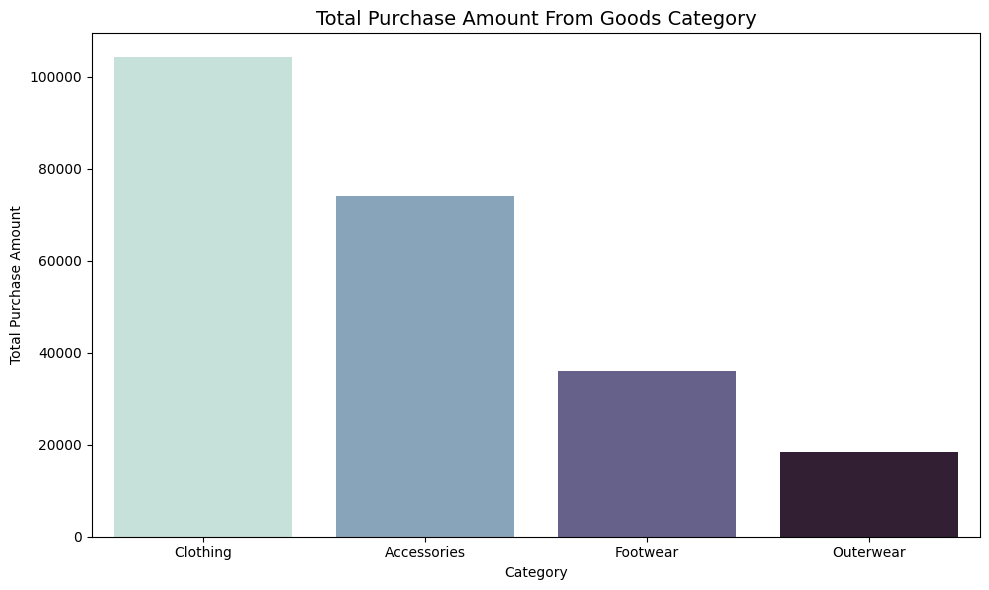

In [103]:
cat_pa = df.groupby("Category")["PA"].sum().reset_index().sort_values(by="PA", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=cat_pa, x='Category', y='PA', palette=sns.cubehelix_palette(n_colors=4, start=0.6, rot=-0.5))

plt.xlabel("Category")
plt.ylabel("Total Purchase Amount")
plt.title("Total Purchase Amount From Goods Category", fontsize=14, loc="center")
plt.tight_layout()
plt.show()

**Insight:**

The product category with the highest total transaction value is Clothing. This aligns with the fact that clothing items are the top selling products overall, whereas Outerwear ranks as the least sold category.

**Recommendation:**

To improve sales across all categories, discounts could be introduced on Footwear and Outerwear products. This would help boost their sales despite narrower profit margins. Meanwhile, inventory for the more in-demand categories can be restocked as needed, based on market demand and evolving fashion trends.
___

### 5.4 EDA 4. Which product size is sold most often?

EDA number 4 is to identify which product size sells the most. This can be visualized by counting the total entries in the 'Size' column.

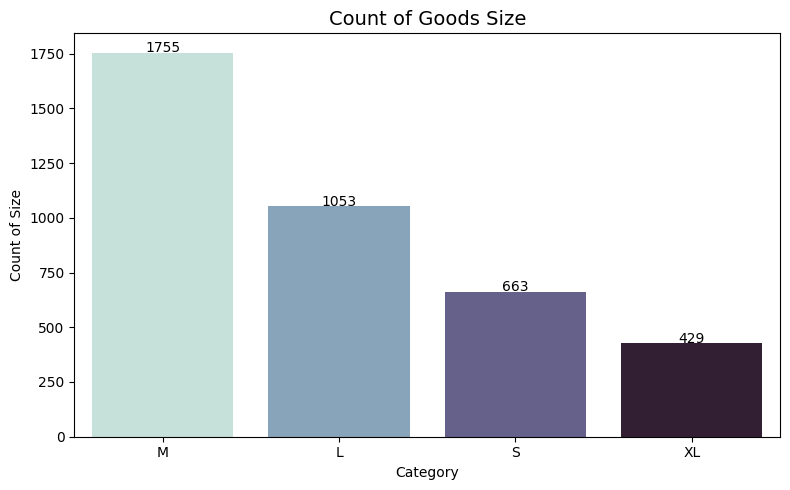

In [105]:
size_counts = df['Size'].value_counts()
size_df = size_counts.reset_index()
size_df.columns = ['Size', 'Count']

plt.figure(figsize=(8, 5))
sns.barplot(data=size_df, x='Size', y='Count', palette=sns.cubehelix_palette(n_colors=4, start=0.6, rot=-0.5))

plt.xlabel("Category")
plt.ylabel("Count of Size")
plt.title("Count of Goods Size", fontsize=14, loc="center")

for i, v in enumerate(size_df['Count']):
    plt.text(i, v + 1, str(v), ha="center", fontsize=10)

plt.tight_layout()
plt.show()

**Insight:**

The best selling product size is M, while the least sold size is XL.

**Recommendation:**

Based on the chart, it is recommended to increase the stock of size M products. Conversely, stock replenishment for sizes S and XL should be minimized, as they exhibit lower sales performance.
___

### 5.5 EDA 5. Are there more subscribed customers than unsubscribed ones?

The store offers a subscription feature for customers, so it's important to determine whether more subscribed customers shop at the store compared to those who are not subscribed.

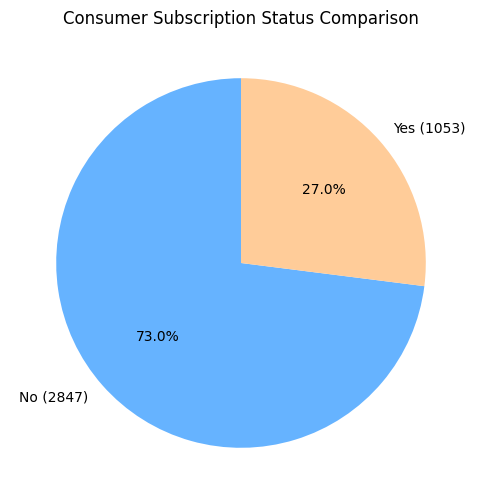

In [60]:
ss_counts = df["SS"].value_counts()

labels = [f"{ss} ({count})" for ss, count in zip(ss_counts.index, ss_counts.values)]

colors = ["#66b3ff", "#ffcc99"]

plt.figure(figsize=(6, 6))
plt.pie(ss_counts, labels=labels, colors=colors, autopct="%.1f%%", startangle=90)

plt.title("Consumer Subscription Status Comparison")
plt.show()

**Insight:**

While most transactions are carried out by customers without a subscription, those who are subscribed still contribute a meaningful share—making up 27% of the total.

**Recommendation:**

The membership subscription feature should be maintained, but it also needs to be made more appealing and worthwhile in the eyes of consumers. This can help attract more customers to register as members, ultimately increasing customer loyalty and boosting overall engagement.
___

### 5.6 EDA 6. What is the total transaction value from subscribed vs. unsubscribed customers?

EDA number 6 aims to analyze whether subscribed customers generate a higher total transaction value compared to non-subscribed ones. 

This is visualized by aggregating the total purchase amount by subscription status, providing insights into the spending behavior of each group.

C:\Users\Yonathan Anggraiwan\AppData\Local\Temp\ipykernel_11028\2146302491.py:4: UserWarning:

The palette list has more values (4) than needed (2), which may not be intended.



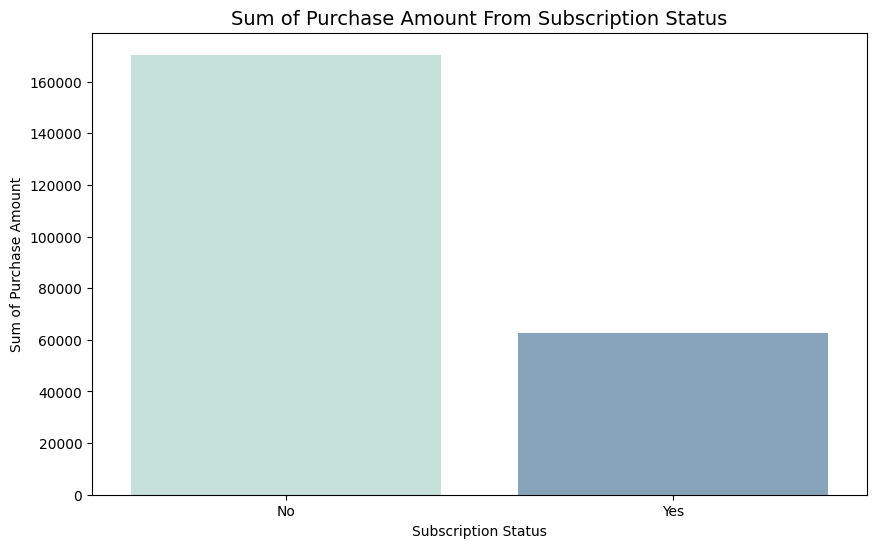

In [106]:
ss_pa = df.groupby("SS")["PA"].sum().reset_index().sort_values(by="PA", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="SS", y="PA", data=ss_pa, palette=sns.cubehelix_palette(n_colors=4, start=0.6, rot=-0.5))

plt.xlabel("Subscription Status")
plt.ylabel("Sum of Purchase Amount")
plt.title("Sum of Purchase Amount From Subscription Status", fontsize=14, loc="center")

plt.show()

**Insight:**

Since the majority of transactions are made by non-subscribed customers, the total transaction value is also significantly higher for this group.

**Recommendation:**

As mentioned earlier, the membership subscription feature should be maintained and further enhanced to appear more appealing and worthwhile to customers. By improving the perceived value of membership, more customers may be encouraged to subscribe, potentially increasing loyalty and long-term engagement.
___

### 5.7 EDA 7. Do more customers use discounts when shopping?

EDA number 7 is to determine whether more customers tend to use discounts. 

Since shoppers are generally inclined to avoid feeling like they're missing out on savings, it's likely that the dataset contains a majority of customers who made purchases using discounts.

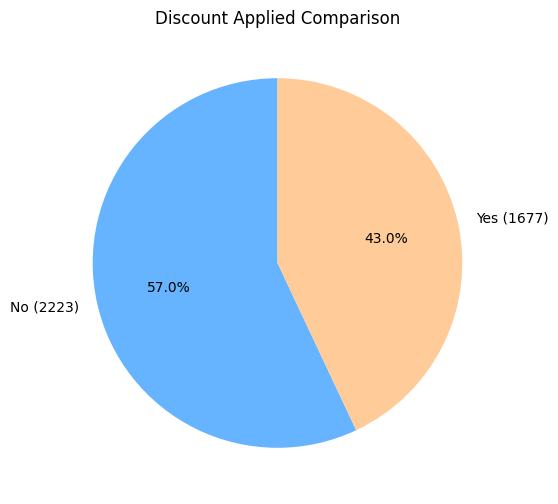

In [62]:
da_counts = df["DA"].value_counts()

labels = [f"{da} ({count})" for da, count in zip(da_counts.index, da_counts.values)]

colors = ["#66b3ff", "#ffcc99"]

plt.figure(figsize=(6, 6))
plt.pie(da_counts, labels=labels, colors=colors, autopct="%.1f%%", startangle=90)

plt.title("Discount Applied Comparison")
plt.show()

**Insight:**

It turns out that more transactions were made without using discounts.

**Recommendation:**

The company should remain cautious when offering discounts. Based on the sales volume, footwear and outerwear are among the least purchased categories. Therefore, it would be more strategic to offer discounts specifically for these two categories, rather than applying them broadly.
___

### 5.8 EDA 8. Is the total transaction value higher for purchases with discounts or without?

When we think about discounts, we often assume that customers will shop more if discounts are offered. Naturally, one would expect that customers spend more when promotions are available. 

However, this assumption should still be tested with a proper data visualization. To investigate, the total transaction amount can be aggregated based on the 'Discount Applied' column.

C:\Users\Yonathan Anggraiwan\AppData\Local\Temp\ipykernel_11028\1389353071.py:4: UserWarning:

The palette list has more values (4) than needed (2), which may not be intended.



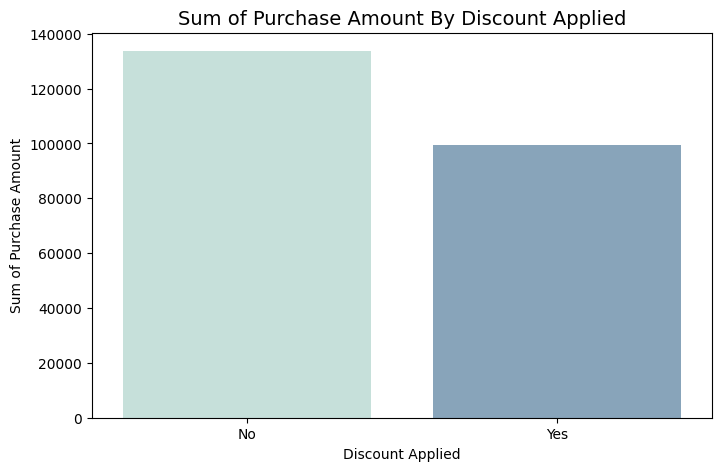

In [107]:
da_pa = df.groupby("DA")["PA"].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=da_pa, x="DA", y="PA", palette=sns.cubehelix_palette(n_colors=4, start=0.6, rot=-0.5))

plt.title("Sum of Purchase Amount By Discount Applied", fontsize=14)
plt.xlabel("Discount Applied")
plt.ylabel("Sum of Purchase Amount")
plt.xticks(rotation=0)

plt.show()


**Insight:**

Customers who did not use discounts contributed to a higher total transaction value. However, the difference in value compared to transactions with discounts is not particularly large.

**Recommendation:**

Moving forward, the company should continue to offer discounts on selected items, as not all customers are indifferent to price reductions. It's important to recognize that some consumers genuinely feel supported by discounts during their shopping experience, which can positively influence purchasing decisions
___

### 5.9 EDA 9. Which season generates the highest transaction volume?

Which season generates the highest total transaction value? This is an important question for the user to understand sales trends based on seasonal patterns. 

The visualization is created by aggregating the total transaction amount according to the season in which the purchase occurred.

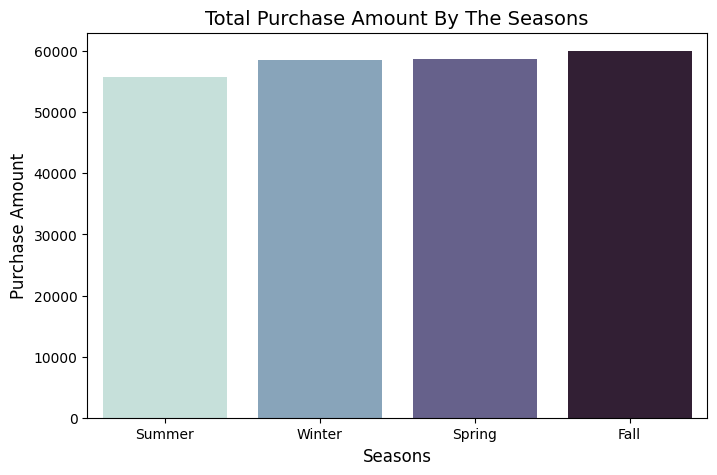

In [108]:
season_pa = df.groupby("Season")["PA"].sum().reset_index().sort_values(by="PA", ascending=True)

plt.figure(figsize=(8, 5))
sns.barplot(data=season_pa, x="Season", y="PA", palette=sns.cubehelix_palette(n_colors=4, start=0.6, rot=-0.5))
plt.title("Total Purchase Amount By The Seasons", fontsize=14, loc="center")
plt.xlabel("Seasons", fontsize=12)
plt.ylabel("Purchase Amount", fontsize=12)

plt.show()

**Insight:**

The season with the lowest total transaction value is Summer, followed by a gradual increase in Winter and Spring, with Fall recording the highest transaction value.

**Recommendation:**

Given the notable seasonal differences, ranging from 1.000 to 4.000 dollars, the company should consider adjusting its marketing strategies seasonally. 

Offering targeted discounts or emphasizing membership benefits in lower-performing seasons could encourage more consistent shopping behavior throughout the year.
___

### 5.10 EDA 10. What is the distribution of sales data across each consumer location?

EDA number 10 explores the distribution of sales data across different consumer locations. 

This analysis helps identify which regions contribute most to overall transactions and may uncover geographic trends in consumer behavior. 

I'm using choropleth for visualize the distribution sales data across each consumer location.

In [65]:
# GeoJSON for location
geojson_url = "https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json"

location_pa = df.groupby("Location")["PA"].sum().reset_index()

fig = px.choropleth(location_pa, 
                    geojson=geojson_url,
                    locations="Location", 
                    featureidkey="properties.name",
                    color="PA",
                    color_continuous_scale="Blues")

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title="Choropleth Map with Plotly - Sum of Purchase Amount",
                  title_x = 0.5)

fig.show()

**Insight:**

The darkest colored regions in the visualization represent store locations with the broadest distribution of sales. 

These include Montana, Idaho, Nevada, California, and Illinois.

___
### 5.11 EDA 11. What are the relationships among all variables?

#### 5.11.1 Analysis Using Mean, Median, Standard Deviation, Skewness, and Kurtosis

Once the dataset has been cleaned, a deeper analysis is required to better understand its characteristics. This involves calculating key statistical metrics such as the mean, median, standard deviation, skewness, and kurtosis for the numerical variables. 

The goal is to assess whether the data can be considered well-distributed and free from significant outliers

Variance, Standard Deviation, Skewness, Kurtosis, and P-value
These statistical metrics help assess the distribution and quality of numerical data. Here's a breakdown of their roles:
1. Variance measures how far the data spreads from the mean.
    - Low variance (<1 or close to 0) = Data is tightly clustered around the mean.
    - Moderate variance (1–10) = Data shows some variation but remains within a reasonable range.
    - High variance (>10) = Data is widely spread with potential outliers.

2. Standard Deviation is the square root of variance, presented in the same units as the original data.
    - Low (<1) = Data is closely centered around the mean.
    - Moderate (1–3) = Noticeable variability, but not excessive.
    - High (>3) = Considerable spread, indicating potential outliers.

3. Skewness identifies asymmetry in the distribution.
    - Around 0 = Approximately symmetric distribution (similar to normal).
    - Positive (>0.5) = Right-skewed, data concentrated on the left.
    - Negative (<–0.5) = Left-skewed, data concentrated on the right.

4. Kurtosis reflects the "tailedness" or sharpness of the distribution.
    - Around 3 = Mesokurtic, similar to a normal distribution.
    - less than or / <3 (platykurtic) = Flatter distribution, fewer outliers.
    - more than or > 3 (leptokurtic) = Sharper peak and longer tails, suggesting more outliers.

5. P-value in normality tests evaluates whether the data significantly deviates from a normal distribution.
    - p > 0.05 = Fail to reject the null hypothesis (data likely follows normal distribution).
    - p ≤ 0.05 = Reject the null hypothesis (data likely does not follow a normal distribution).

In [66]:
print(f'The variance of the Age column is {df["Age"].var().__round__(2)}')         
print(f'The skewness of the Age column is {df["Age"].skew().__round__(3)}')        
print(f'The kurtosis of the Age column is {df["Age"].kurtosis().__round__(2)}')    
res = stats.normaltest(df['Age'])
print(f'The p-value from the normality test for the Age column is {res.pvalue}')   

The variance of the Age column is 231.27
The skewness of the Age column is -0.006
The kurtosis of the Age column is -1.2
The p-value from the normality test for the Age column is 0.0


**Insight:**

1. Variance = 231.27

    This indicates the degree of dispersion or variability in the age data. A higher variance means greater differences among age values. In this case, 231.27 suggests a relatively wide age range.
2. Skewness = -0.006

    This value is very close to zero, suggesting that the age distribution is highly symmetrical or nearly normal. A more negative skew would imply a left-skewed distribution (more high values), but here, the distribution is practically balanced.
3. Kurtosis = -1.2

    A negative kurtosis value indicates a flatter distribution than the normal curve. This suggests fewer outliers and a more even spread of values around the mean.
4. Normality Test p-value = 0.0

    Since the p-value is very small (≤ 0.05), we reject the null hypothesis (H0) and conclude that the age column does not follow a normal distribution. This means that although skewness is near zero, other distribution characteristics deviate significantly from normality

___

In [67]:
print(f'The variance of the purchase amount column is {df["PA"].var().__round__(2)}')
print(f'The skewness of the purchase amount column is {df["PA"].skew().__round__(3)}')
print(f'The kurtosis of the purchase amount column is {df["PA"].kurtosis().__round__(2)}')
res = stats.normaltest(df['PA'])
print(f'The p-value from the normality test for the purchase amount column is {res.pvalue}')

The variance of the purchase amount column is 561.0
The skewness of the purchase amount column is 0.013
The kurtosis of the purchase amount column is -1.24
The p-value from the normality test for the purchase amount column is 0.0


1. Variance = 561.0

    This high variance indicates a significant spread in transaction values. The amount customers spend varies widely, suggesting distinct shopping behaviors among individuals.
2. Skewness = 0.013

    With a value very close to zero, the data distribution is nearly symmetrical and resembles a normal distribution. There is no strong skew toward higher or lower purchase amounts.
3. Kurtosis = –1.24

    A negative kurtosis suggests a flatter distribution than the normal curve. This implies that customer spending is fairly evenly distributed, with few extreme outliers.
4. P-Value = 0.0

    Since the p-value is less than or equal to 0.05, we reject the null hypothesis (H0) and conclude that the purchase amount data is not normally distributed, despite having near-zero skewness and moderate kurtosis.


In [68]:
print(f'The variance of the previous purchases column is {df["PP"].var().__round__(2)}')        
print(f'The skewness of the previous purchases column is {df["PP"].skew().__round__(3)}')     
print(f'The kurtosis of the previous purchases column is {df["PP"].kurtosis().__round__(3)}') 
res = stats.normaltest(df['PP'])
print(f'The p-value from the normality test for the previous purchases column is {res.pvalue}')

The variance of the previous purchases column is 208.72
The skewness of the previous purchases column is 0.003
The kurtosis of the previous purchases column is -1.19
The p-value from the normality test for the previous purchases column is 0.0


**Insight:**

1. Variance = 208.72

    The high variance in the Previous Purchases column indicates substantial variation in past transaction amounts. Some customers shop frequently, while others make purchases only occasionally.
2. Skewness = 0.003

    A value this close to zero suggests that the data is nearly symmetrical, with no significant skew to the right or left.
3. Kurtosis = –1.19

    The negative kurtosis indicates a flatter distribution compared to the normal curve. This means fewer extreme values, with the data more evenly spread around the mean, although some mild outliers are still present.
4. Normality Test p-value = 0.0

    Since the p-value is very small (≤ 0.05), we reject the null hypothesis (H0) and conclude that the Previous Purchases column does not follow a normal distribution.

In [69]:
print(f'The variance of the review rating column is {df["RR"].var().__round__(2)}')    
print(f'The skewness of the review rating column is {df["RR"].skew().__round__(2)}')    
print(f'The kurtosis of the review rating column is {df["RR"].kurtosis().__round__(2)}') 
res = stats.normaltest(df['RR'])
print(f'The p-value from the normality test for the review rating column is {res.pvalue}')

The variance of the review rating column is 0.51
The skewness of the review rating column is 0.0
The kurtosis of the review rating column is -1.18
The p-value from the normality test for the review rating column is 0.0


1. Variance = 0.51

    Indicates minimal variation among ratings, meaning most customers gave similar scores without drastic differences

2. Skewness = 0.0

    The distribution is perfectly symmetrical, suggesting ratings are evenly spread with no strong lean toward high or low values.

3. Kurtosis = -1.18

    The flatness of the distribution indicates a more uniform spread across ratings, with fewer extreme outliers.

4. Normality Test p-value = 0.0

    Despite balanced skewness and modest kurtosis, the very low p-value suggests the distribution deviates significantly from normality—likely due to subtle patterns in the data not captured by symmetry alone.
___

Because several columns have slightly high kurtosis values, I want to verify the percentage of outliers in the data.

In [70]:
Q1_purchase = df['PA'].quantile(0.25)
Q3_purchase = df['PA'].quantile(0.75)

IQR_purchase = Q3_purchase - Q1_purchase 

lower_bound_purchase = Q1_purchase - 1.5 * IQR_purchase
upper_bound_purchase = Q3_purchase + 1.5 * IQR_purchase


outliers_purchase = df[(df['PA'] < lower_bound_purchase) | (df['PA'] > upper_bound_purchase)]

non_outliers_purchase = df[(df['PA'] >= lower_bound_purchase) & (df['PA'] <= upper_bound_purchase)]

percent_outliers_purchase = (len(outliers_purchase) / len(df)) * 100
print(f"Outlier percentage: {percent_outliers_purchase:.2f}%")

Outlier percentage: 0.00%


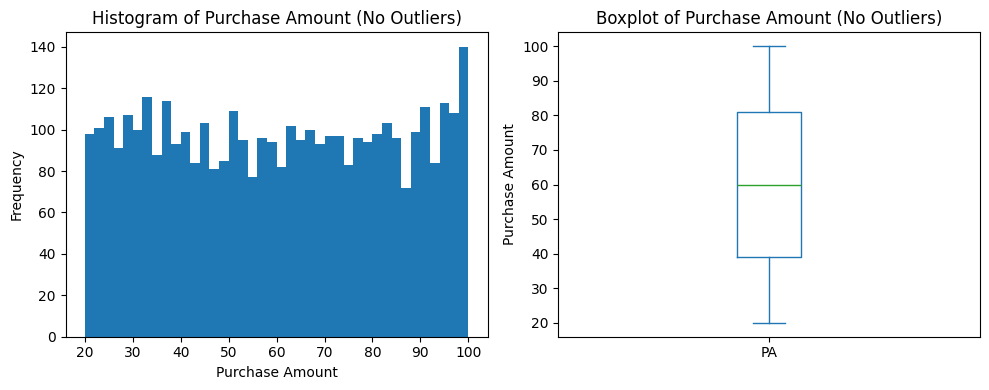

In [71]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))

non_outliers_purchase['PA'].plot(kind='hist', bins=40, ax=ax[0])
ax[0].set_title("Histogram of Purchase Amount (No Outliers)")
ax[0].set_xlabel("Purchase Amount")
ax[0].set_ylabel("Frequency")

non_outliers_purchase['PA'].plot(kind='box', ax=ax[1])
ax[1].set_title("Boxplot of Purchase Amount (No Outliers)")
ax[1].set_ylabel("Purchase Amount")

plt.tight_layout()
plt.show()

In [72]:
Q1_previous = df['PP'].quantile(0.25)
Q3_previous = df['PP'].quantile(0.75)

IQR_previous = Q3_previous - Q1_previous

lower_bound_previous = Q1_previous - 1.5 * IQR_previous
upper_bound_previous = Q3_previous + 1.5 * IQR_previous

outliers_previous = df[(df['PP'] < lower_bound_previous) | (df['PP'] > upper_bound_previous)]
non_outliers_previous = df[(df['PP'] >= lower_bound_previous) & (df['PP'] <= upper_bound_previous)]

percent_outliers_previous = (len(outliers_previous) / len(df)) * 100
print(f"Outlier percentage: {percent_outliers_previous:.2f}%")

Outlier percentage: 0.00%


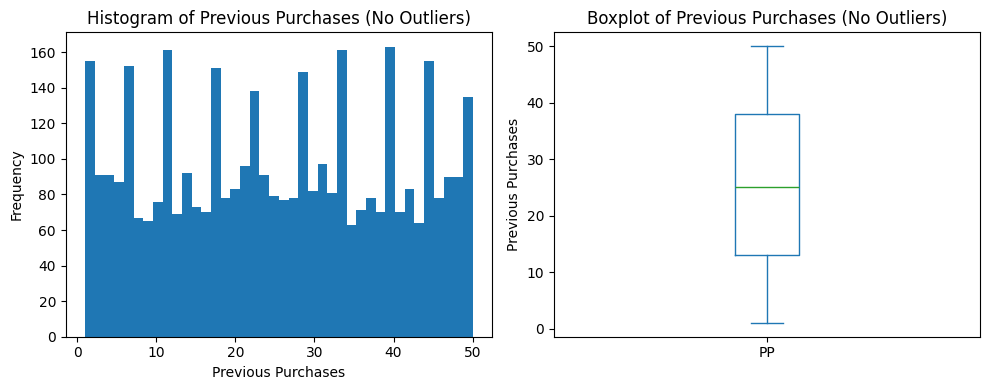

In [73]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))

non_outliers_previous['PP'].plot(kind='hist', bins=40, ax=ax[0])
ax[0].set_title("Histogram of Previous Purchases (No Outliers)")
ax[0].set_xlabel("Previous Purchases")
ax[0].set_ylabel("Frequency")

non_outliers_previous['PP'].plot(kind='box', ax=ax[1])
ax[1].set_title("Boxplot of Previous Purchases (No Outliers)")
ax[1].set_ylabel("Previous Purchases")

plt.tight_layout()
plt.show()

In [74]:
Q1_rating = df['RR'].quantile(0.25)
Q3_rating = df['RR'].quantile(0.75)

IQR_rating = Q3_rating - Q1_rating

lower_bound_rating = Q1_rating - 1.5 * IQR_rating
upper_bound_rating = Q3_rating + 1.5 * IQR_rating

outliers_rating = df[(df['RR'] < lower_bound_rating) | (df['RR'] > upper_bound_rating)]
non_outliers_rating = df[(df['RR'] >= lower_bound_rating) & (df['RR'] <= upper_bound_rating)]

percent_outliers_rating = (len(outliers_rating) / len(df)) * 100
print(f"Outlier percentage: {percent_outliers_rating:.2f}%")

Outlier percentage: 0.00%


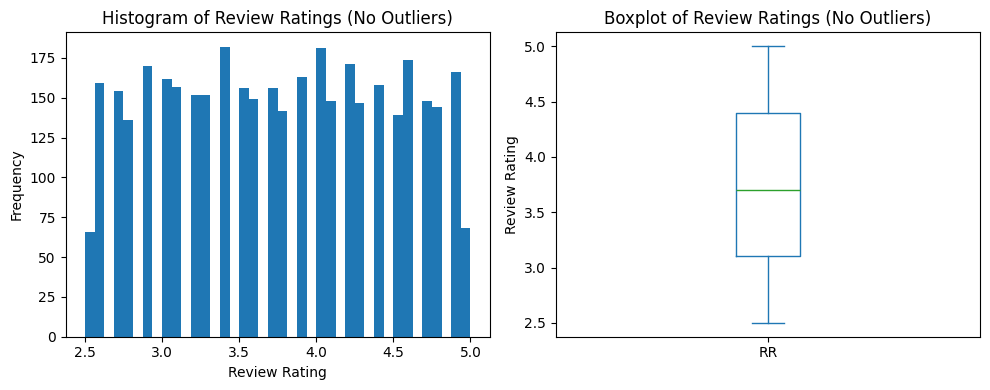

In [75]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))

non_outliers_rating['RR'].plot(kind='hist', bins=40, ax=ax[0])
ax[0].set_title("Histogram of Review Ratings (No Outliers)")
ax[0].set_xlabel("Review Rating")
ax[0].set_ylabel("Frequency")

non_outliers_rating['RR'].plot(kind='box', ax=ax[1])
ax[1].set_title("Boxplot of Review Ratings (No Outliers)")
ax[1].set_ylabel("Review Rating")

plt.tight_layout()
plt.show()

Insight:
Based on the calculations and visualizations above, the Purchase Amount, Previous Purchases, and Review Rating columns are considered clean, with no significant outliers. Each column shows meaningful variation in values, but remains within a reasonable range that supports reliable statistical analysis.
___

### 5.12 EDA 12. What are the relationships among all variables?

EDA 12 aims to identify whether there are relationships between each variable or column. The goal is to determine if any of them have an impact, which requires careful calculation or visualization. 

I also need to formulate hypotheses to help answer this question.

Formulating Hypotheses:

- Null Hypothesis (H0):
There is no significant relationship between the variables or columns.

- Alternative Hypothesis (H1):
There is a significant relationship between the variables or columns.

Decision Rule Based on p-value:

- If p-value < 0.05 = Reject H0 and accept H1.

- If p-value ≥ 0.05 = Fail to reject H0.

Since the dataset does not follow a normal distribution, I used the Spearman method to calculate the p-value and the strength of correlation between variables or columns.

In [76]:
# Calculate the Spearman correlation and p-value between the numeric columns: Purchase Amount and Review Rating
corr_rho, pval_s = stats.spearmanr(df['PA'], df['RR'])

print(f"Spearman correlation: {corr_rho:.2f}, p-value: {pval_s}")

Spearman correlation: 0.03, p-value: 0.05782360378309655


**Insight:**

Since the p-value is greater than 0.05, we fail to reject the null hypothesis (H0). 

This indicates that there is no statistically significant relationship between the Purchase Amount column and the Review Rating column.
___

In [77]:
# Calculate the Spearman correlation and p-value between Purchase Amount and Previous Purchases
corr_rho, pval_s = stats.spearmanr(df['PA'], df['PP'])

print(f"Spearman correlation: {corr_rho:.2f}, p-value: {pval_s}")

Spearman correlation: 0.01, p-value: 0.6036830945527644


Insight:

Since the p-value is greater than 0.05, we fail to reject the null hypothesis (H0). 

This suggests that there is no statistically significant relationship between the Purchase Amount column and the Previous Purchases column.
___

In [78]:
# Calculate the Spearman correlation and p-value between Purchase Amount and Customer Age
corr_rho, pval_s = stats.spearmanr(df['PA'], df['Age'])

print(f"Spearman correlation: {corr_rho:.2f}, p-value: {pval_s}")

Spearman correlation: -0.01, p-value: 0.5143568334160391


**Insight:**

Since the p-value is greater than 0.05, we fail to reject the null hypothesis (H0). 

This means there is no statistically significant relationship between the Purchase Amount column and the Customer Age column.
___

There is no relationship between the numeric columns, but I would still like to display a correlation matrix of all those numeric columns.

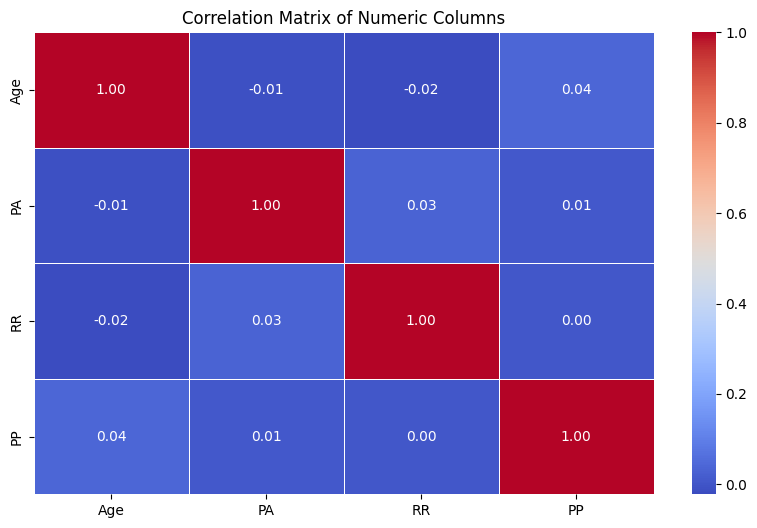

In [79]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_columns].corr(method="pearson")  # Menghitung korelasi Pearson

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix of Numeric Columns")
plt.show()


Based on the correlation calculations among numeric columns, there appears to be no strong relationship between any pair of variables. 

This suggests that each column behaves independently and is not influenced by the others
___

It's time to analyze the relationships between categorical variables! The following are the results of calculations that show categorical variables with a high level of association, which I measured using the Chi-Square algorithm.

In [80]:
contingency_table_gender_ST = pd.crosstab(df['Gender'], df['Shipping Type'])

chi2, p, dof, expected = stats.chi2_contingency(contingency_table_gender_ST)

print(f"Chi-Square Statistic: {chi2:.3f}")
print(f"P-value: {p:.3f}")

Chi-Square Statistic: 12.243
P-value: 0.032


With a Chi-Square value of 12.243 and a p-value of 0.032, we accept H1, indicating a strong relationship between the "Gender" variable and the "Shipping Type" column.

I present the strength of this association using the Cramér's V calculation.

In [81]:
def cramers_v(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

cramers_v_value = cramers_v(contingency_table_gender_ST)
print(f"Cramér's V: {cramers_v_value:.3f}")

Cramér's V: 0.056


With a Cramér's V value of 0.056, the strength of the association between these variables is very weak. How about "Gender" x "Subscription Status"?
___

In [82]:
contingency_table_gender_SS = pd.crosstab(df['Gender'], df['SS'])

chi2, p, dof, expected = stats.chi2_contingency(contingency_table_gender_SS)

print(f"Chi-Square Statistic: {chi2:.3f}")
print(f"P-value: {p:.3f}")

Chi-Square Statistic: 676.794
P-value: 0.000


With a Chi-Square value of 676.794 and a p-value below 0.05, we accept H1, indicating a strong relationship between the "Gender" variable and the "Subscription Status" column.

I present the strength of this association using Cramér"s V and visualize the correlation with the heatmap below.


In [83]:
def cramers_v(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

cramers_v_value = cramers_v(contingency_table_gender_SS)
print(f"Cramér's V: {cramers_v_value:.3f}")

Cramér's V: 0.417


With a Cramér's V value of 0.417, the strength of the association between the two variables 'Gender' and 'Subscription Status' falls into the moderate category.

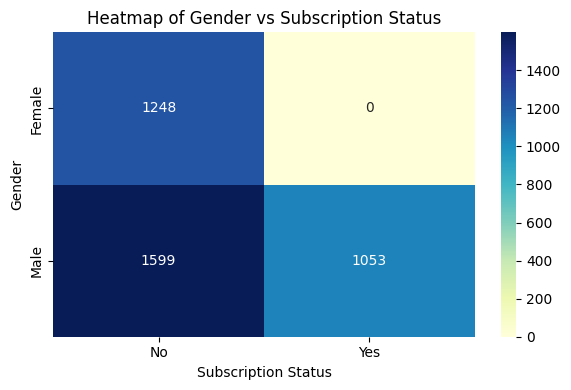

In [84]:
plt.figure(figsize=(6, 4))
sns.heatmap(contingency_table_gender_SS, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap of Gender vs Subscription Status")
plt.xlabel("Subscription Status")
plt.ylabel("Gender")
plt.tight_layout()
plt.show()

**Insight:**

- No "Female" customers subscribed to the membership (Gender = Female & SS = Yes), frequency = 0

- "Male" customers who subscribed to the membership (Gender = Male & SS = Yes), frequency = 1,053

- "Female" customers who did not subscribe to the membership (Gender = Female & SS = No), frequency = 1,248

- "Male" customers who did not subscribe to the membership (Gender = Male & SS = No), frequency = 1,599

**Conclusion:**

This insight suggests that the membership program has not attracted interest from the Female customer segment. Therefore, the company should consider enhancing the appeal of the membership offering—possibly by tailoring benefits or features that better align with the preferences of female customers.

How about "Gender" x "Discount_Applied"?
___

In [85]:
contingency_table_gender_da = pd.crosstab(df['Gender'], df['DA'])

chi2, p, dof, expected = stats.chi2_contingency(contingency_table_gender_da)

print(f"Chi-Square Statistic: {chi2:.3f}")
print(f"P-value: {p:.3f}")

Chi-Square Statistic: 1381.941
P-value: 0.000


With a Chi-Square value of 1381.941 and a p-value below 0.05, we accept H₁, indicating a relationship between the 'Gender' variable and the 'Discount Applied' column.

I present the strength of this association using Cramér's V and visualize the correlation with the heatmap below.

In [86]:
def cramers_v(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

cramers_v_value = cramers_v(contingency_table_gender_da)
print(f"Cramér's V: {cramers_v_value:.3f}")

Cramér's V: 0.595


With a Cramér's V value of 0.595, the strength of the association between the two variables 'Gender' and 'Subscription Status' falls within the moderate-to-strong category.

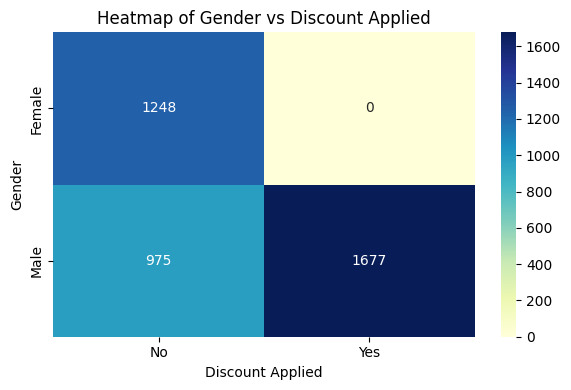

In [87]:
plt.figure(figsize=(6, 4))
sns.heatmap(contingency_table_gender_da, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap of Gender vs Discount Applied")
plt.xlabel("Discount Applied")
plt.ylabel("Gender")
plt.tight_layout()
plt.show()

**Insight:**

- No Female customers used discounts (Gender = Female & DA = Yes), frequency = 0
- Male customers who used discounts (Gender = Male & DA = Yes), frequency = 1,677
- Female customers who did not use discounts (Gender = Female & DA = No), frequency = 1,248
- Male customers who did not use discounts (Gender = Male & DA = No), frequency = 975

**Conclusion:**

This suggests that no Female customers have applied or used discounts, whereas a significant number of Male customers have. Therefore, the discount feature should be retained, as it appears to hold value—particularly for the male customer segment.

How about 'Discount_Applied' x 'Subscription_Status'?
___

In [88]:
contingency_table = pd.crosstab(df['DA'], df['SS'])

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2:.3f}")
print(f"P-value: {p:.3f}")

Chi-Square Statistic: 1908.921
P-value: 0.000


The p-value is below 0.05, which means we accept H1, indicating a relationship between the 'Discount Applied' variable and the 'Subscription Status' column. 

I present the strength of this association using Cramér's V and visualize the correlation with the heatmap below.

In [89]:
def cramers_v(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

cramers_v_value = cramers_v(contingency_table)
print(f"Cramér's V: {cramers_v_value:.3f}")

Cramér's V: 0.700


With a Cramér's V value of 0.7, the relationship between the variables 'Discount Applied' and 'Subscription Status' is fairly strong and positively correlated. 

This suggests that customers who subscribe to the membership program tend to use discounts, and conversely, those who use discounts are likely to be store members.

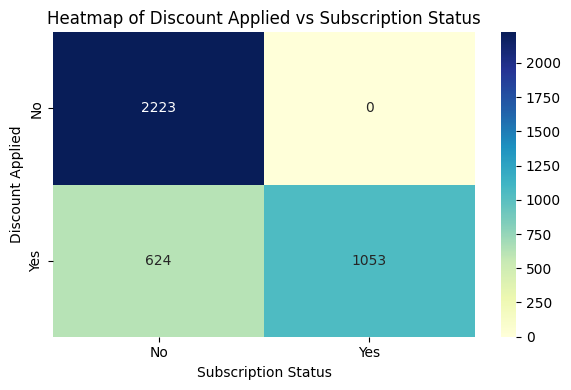

In [90]:
plt.figure(figsize=(6, 4))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap of Discount Applied vs Subscription Status")
plt.xlabel("Subscription Status")
plt.ylabel("Discount Applied")
plt.tight_layout()
plt.show()

Insight:

- Customers who did not apply for a discount and are not subscribed to the membership (DA = No & SS = No), frequency = 2,223

- Customers who did not apply for a discount but are subscribed to the membership (DA = No & SS = Yes), frequency = 0

- Customers who applied for a discount and are subscribed to the membership (DA = Yes & SS = Yes), frequency = 1,053

- Customers who applied for a discount but are not subscribed to the membership (DA = Yes & SS = No), frequency = 624

**Conclusion:**
All subscribed members (SS = Yes) used discounts (DA = Yes), as reflected by the absence of any customers in the category of “No Discount + Membership.” This strongly suggests that the discount feature is tightly coupled with membership usage. Additionally, while a significant portion of non members also utilized discounts (624 out of 2,847 non subscribed customers), the discount benefit appears to be particularly compelling for those within the membership program.

This pattern implies that discounts may serve as a key motivator for subscription or as an exclusive incentive tied to the membership experience. To capitalize on this behavior, the company could consider reinforcing the visibility of discount related benefits within its membership offerings, or even test a "members only discount" campaign to boost both engagement and subscription rates.



___

## 6.1 Conclusion

Following the analysis of the dataset, several recommendations have been identified that the company can consider to enhance customer engagement and drive sales:

- Product Types and Brands Offered

    The company should stay attuned to current brand trends and customer preferences. By aligning product offerings with market demand and evolving consumer interests, the company can boost appeal and attract new customers while retaining existing ones.

- Membership Subscription Features

    Enhancing the membership program by adding attractive and clearly beneficial features may incentivize customers to subscribe. If the membership is perceived as mutually beneficial, it is likely to increase shopping activity and attract new members.

- Sustaining the Discount Program

    Given the popularity of discount usage among customers, maintaining this feature is essential. The company could also consider offering larger discounts for higher-value purchases to encourage increased transaction amounts.

- Seasonal Event Planning

    Organizing relevant, timely seasonal events or promotional campaigns may attract both loyal and new customers, potentially boosting transaction volume during specific periods.

- Improving Service and Product Quality

    Based on the average customer review score of 3.75, an indication of generally neutral satisfaction. The company should consider employee training to improve service attitudes. 
    
    Additionally, attention should be paid to enhancing product quality to increase customer satisfaction and raise overall ratings.
___